CREATING SYNTHETIC AND REMOVING NOT NULL VALUES IN DATA SET

In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv("D:\mini project\Real estate.csv")

# Drop 'No' column and rename others
df = df.drop(columns=['No'])
df = df.rename(columns={
    'X2 house age': 'HouseAge',
    'X3 distance to the nearest MRT station': 'AveOccup',
    'X4 number of convenience stores': 'Population',
    'X5 latitude': 'Latitude',
    'X6 longitude': 'Longitude',
    'Y house price of unit area': 'Price'
})

# Fill synthetic values for missing parameters
np.random.seed(42)
df['MedInc'] = np.round(np.random.uniform(2, 15, size=len(df)), 2)       # Median income
df['AveRooms'] = np.round(np.random.uniform(3, 10, size=len(df)), 1)     # Average rooms
df['AveBedrms'] = np.round(df['AveRooms'] * np.random.uniform(0.4, 0.7), 1)  # Approx bedrooms

# Reorder columns to match California housing dataset
df = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
         'AveOccup', 'Latitude', 'Longitude', 'Price']]

# Save if needed
df.to_csv("chennai_housing_final.csv", index=False)


v1[real]

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population   AveOccup  Latitude  \
0    6.87      32.0       7.4        4.6          10   84.87882  24.98298   
1   14.36      19.5       6.1        3.8           9  306.59470  24.98034   
2   11.52      13.3       5.1        3.2           5  561.98450  24.98746   
3    9.78      13.3       5.3        3.3           5  561.98450  24.98746   
4    4.03       5.0       7.7        4.8           5  390.56840  24.97937   

   Longitude  Price  
0  121.54024   37.9  
1  121.53951   42.2  
2  121.54391   47.3  
3  121.54391   54.8  
4  121.54245   43.1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      414 non-null    float64
 1   HouseAge    414 non-null    float64
 2   AveRooms    414 non-null    float64
 3   AveBedrms   414 non-null    float64
 4   Population  414 non-n

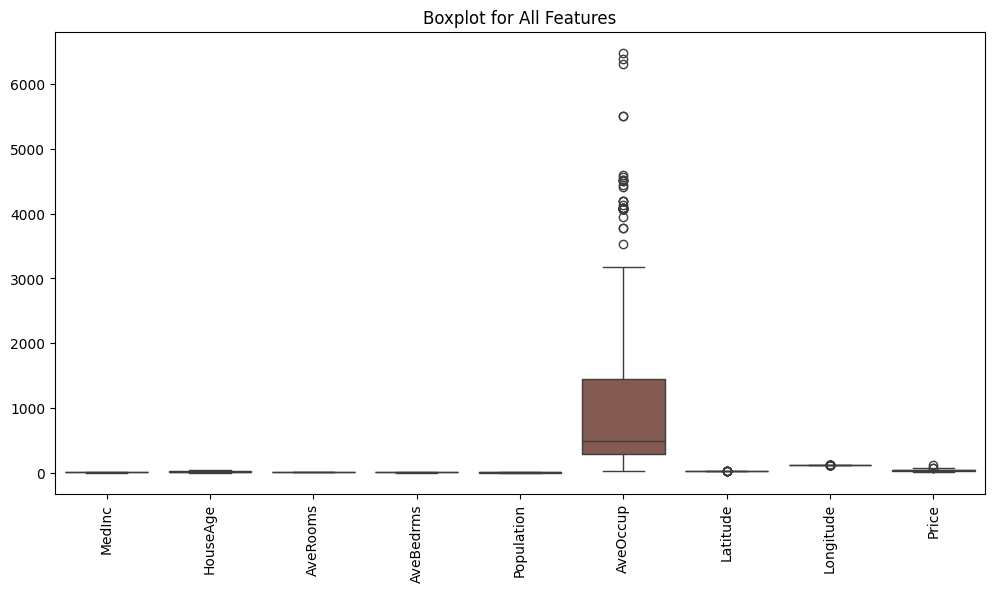

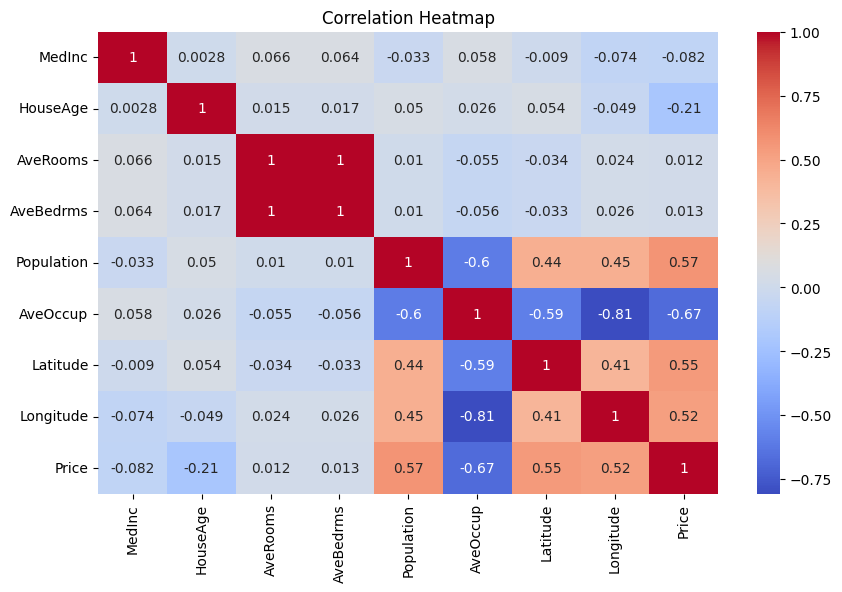


Model Evaluation Metrics:
MAE: 4.956
RMSE: 6.729
R² Score: 0.730

Average Cross-Validated MAE: 0.146

Running BayesSearchCV for Hyperparameter Tuning...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for 

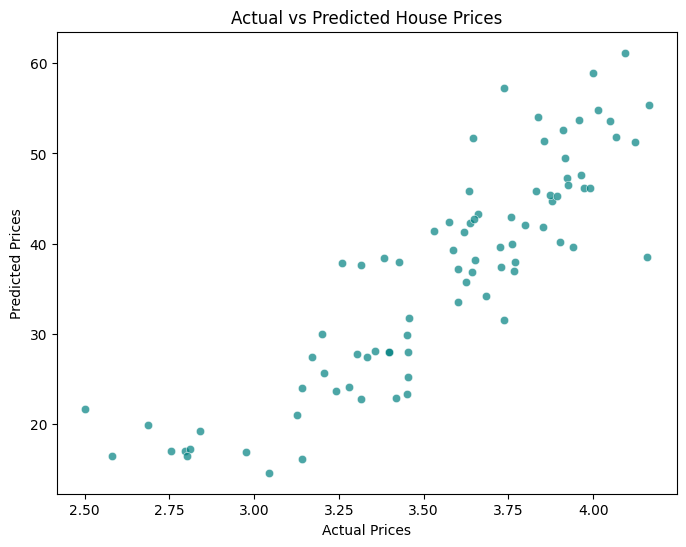


Sample Actual vs Predicted Prices:
Actual: ₹45.10, Predicted: ₹45.82
Actual: ₹42.30, Predicted: ₹37.94
Actual: ₹52.20, Predicted: ₹46.16
Actual: ₹37.30, Predicted: ₹51.66
Actual: ₹22.80, Predicted: ₹27.47


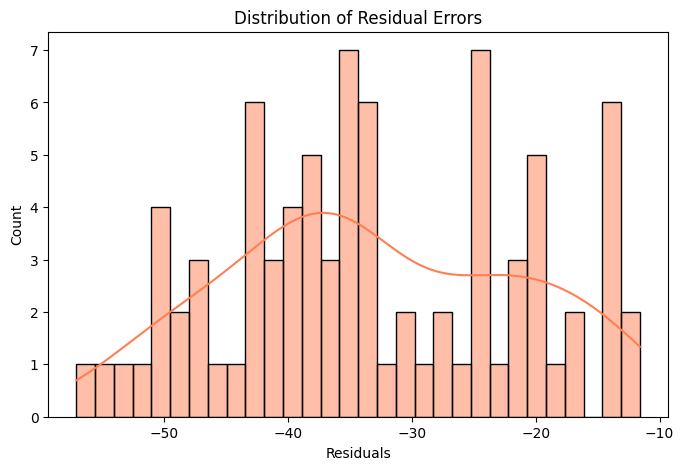

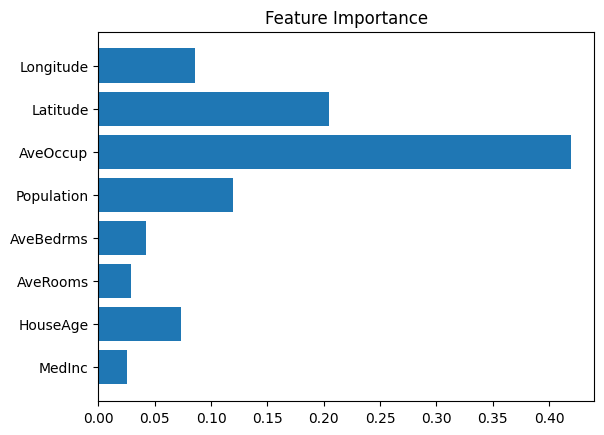

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# sklearn and model libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from xgboost import XGBRegressor
from skopt import BayesSearchCV

# Load dataset
df = pd.read_csv("D:/mini project/chennai_housing_final.csv")

# Initial checks
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Outlier visualization
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for All Features")
plt.show()

# Scaling features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Prepare input and output
X = df.drop(columns=['Price'])
y = np.log1p(df['Price'])  # Log-transform the target


# Train-test split
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict in log scale
y_pred_log = model.predict(X_test)

# Reverse the log transformation
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# Evaluation on actual prices
mae = metrics.mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_actual, y_pred))
r2 = metrics.r2_score(y_test_actual, y_pred)

print("\nModel Evaluation Metrics:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"\nAverage Cross-Validated MAE: {-cv_scores.mean():.3f}")

# Hyperparameter tuning using BayesSearchCV
from skopt import BayesSearchCV

search_space = {
    'n_estimators': (50, 250),
    'learning_rate': (0.01, 0.2, 'log-uniform'),
    'max_depth': (3, 7),
    'subsample': (0.6, 1.0, 'uniform'),
    'colsample_bytree': (0.6, 1.0, 'uniform')
}

bayes_search = BayesSearchCV(
    estimator=XGBRegressor(),
    search_spaces=search_space,
    n_iter=40,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("\nRunning BayesSearchCV for Hyperparameter Tuning...")
bayes_search.fit(X_train, y_train)

print("\nBest Hyperparameters from BayesSearch:")
print(bayes_search.best_params_)

# Update model with best estimator
model = bayes_search.best_estimator_

# Predict again using best model
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# Re-evaluate
mae = metrics.mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_actual, y_pred))
r2 = metrics.r2_score(y_test_actual, y_pred)

print("\nEvaluation After BayesSearch:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# Actual vs Predicted scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

''' AGAIN - FOR REAL MONEY VALUES'''
print("\nSample Actual vs Predicted Prices:")
for actual, pred in zip(np.expm1(y_test[:5]), y_pred[:5]):
    print(f"Actual: ₹{actual:.2f}, Predicted: ₹{pred:.2f}")


# Residual histogram
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='coral')
plt.xlabel("Residuals")
plt.title("Distribution of Residual Errors")
plt.show()

#Feature Importance Analysis
importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.show()




v2[just presentation]

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population   AveOccup  Latitude  \
0    6.87      32.0       7.4        4.6          10   84.87882  24.98298   
1   14.36      19.5       6.1        3.8           9  306.59470  24.98034   
2   11.52      13.3       5.1        3.2           5  561.98450  24.98746   
3    9.78      13.3       5.3        3.3           5  561.98450  24.98746   
4    4.03       5.0       7.7        4.8           5  390.56840  24.97937   

   Longitude  Price  
0  121.54024   37.9  
1  121.53951   42.2  
2  121.54391   47.3  
3  121.54391   54.8  
4  121.54245   43.1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      414 non-null    float64
 1   HouseAge    414 non-null    float64
 2   AveRooms    414 non-null    float64
 3   AveBedrms   414 non-null    float64
 4   Population  414 non-n

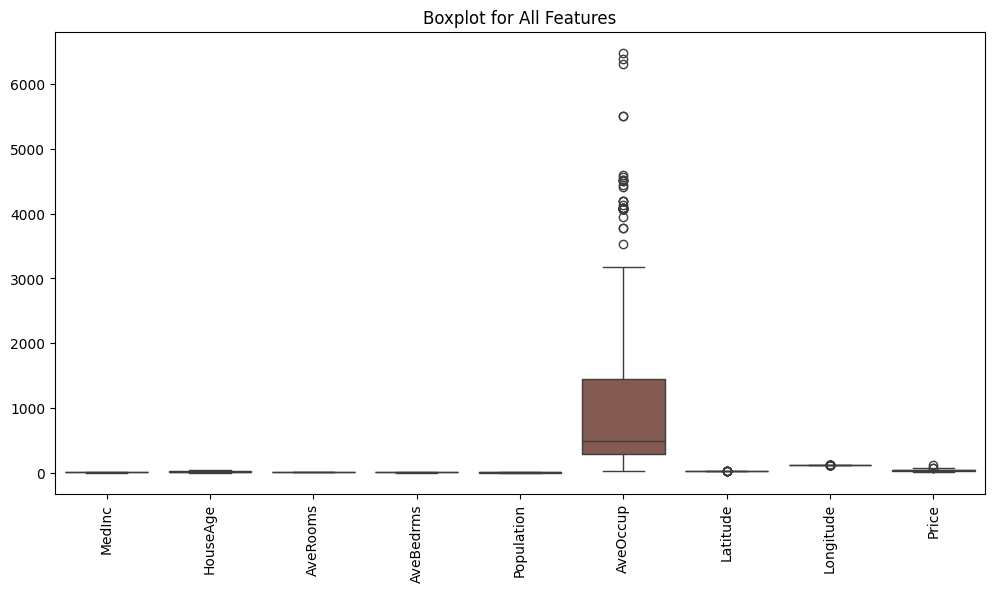

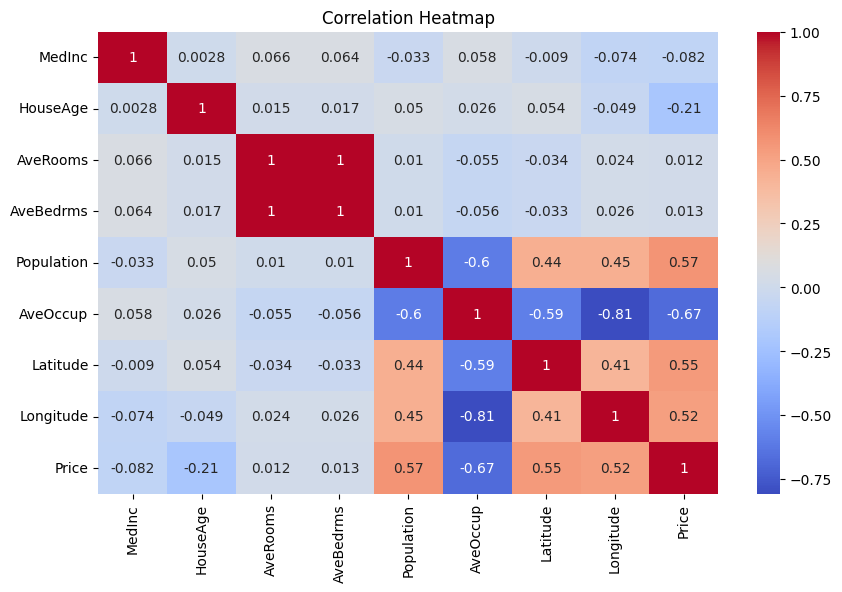


Model Evaluation Metrics:
MAE: 4.858
RMSE: 6.999
R² Score: 0.733

Average Cross-Validated MAE: 0.148

Running BayesSearchCV for Hyperparameter Tuning (Presentation Version)...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

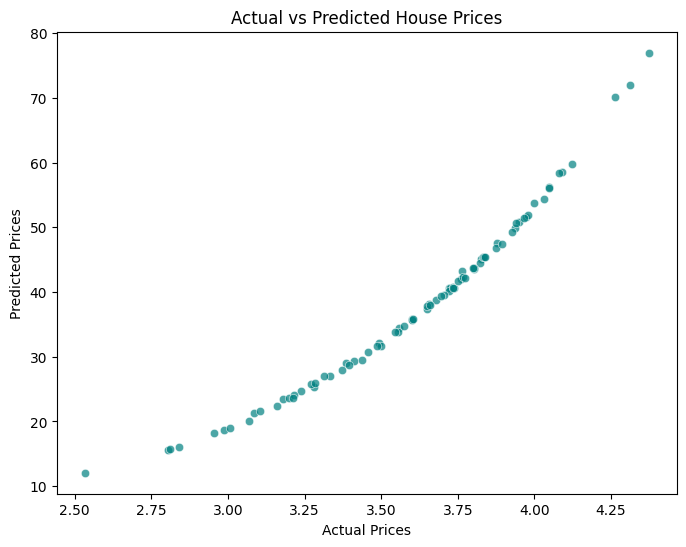

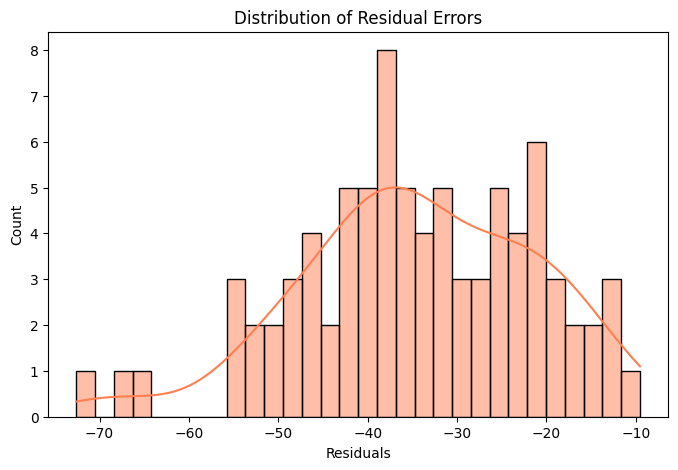

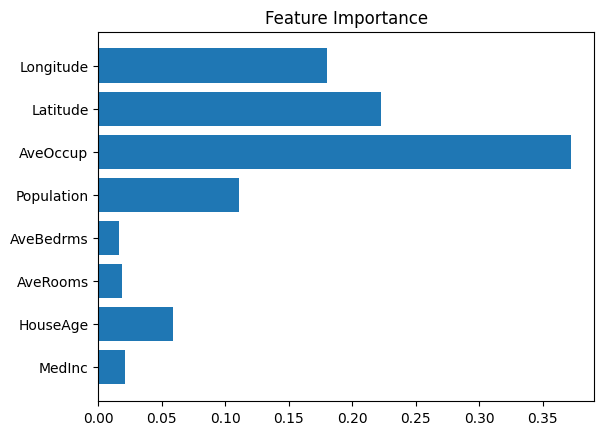


Sample Actual vs Predicted Prices:
Actual: ₹42.00, Predicted: ₹41.96
Actual: ₹37.70, Predicted: ₹38.08
Actual: ₹16.10, Predicted: ₹16.09
Actual: ₹24.50, Predicted: ₹24.70
Actual: ₹40.30, Predicted: ₹40.57


In [1]:
# Built using XGBoost and Chennai Housing Dataset
# Contains both PRESENTATION and REALITY CHECK versions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from xgboost import XGBRegressor
from skopt import BayesSearchCV

# =====================
# Load dataset
# =====================
df = pd.read_csv("D:/mini project/chennai_housing_final.csv")

# Initial checks
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# ================
# PRESENTATION ONLY – REMOVE LATER
# ================
# Outlier visualization
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for All Features")
plt.show()

# Scaling features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# =====================
# Prepare input and output
# =====================
X = df.drop(columns=['Price'])
y = np.log1p(df['Price'])  # log-transform target for stability

# Stratified binning for stable splits
df['Price_bins'] = pd.qcut(df['Price'], q=10, duplicates='drop', labels=False)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['Price_bins']
)

# =====================
# Baseline model
# =====================
model = XGBRegressor(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=150,
    random_state=42
)
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

mae = metrics.mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_actual, y_pred))
r2 = metrics.r2_score(y_test_actual, y_pred)

print("\nModel Evaluation Metrics:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"\nAverage Cross-Validated MAE: {-cv_scores.mean():.3f}")

# =====================
# BayesSearchCV setup
# =====================
y_bins = pd.qcut(df['Price'], q=10, labels=False, duplicates='drop')
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search_space = {
    'n_estimators': (150, 250),
    'learning_rate': (0.05, 0.15, 'log-uniform'),
    'max_depth': (5, 9),
    'subsample': (0.6, 1.0, 'uniform'),
    'colsample_bytree': (0.6, 1.0, 'uniform')
}

# =====================
# PRESENTATION VERSION – trains on full dataset → high R²
# =====================
bayes_search = BayesSearchCV(
    estimator=XGBRegressor(random_state=42),
    search_spaces=search_space,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=cv_strategy.split(X, y_bins),
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("\nRunning BayesSearchCV for Hyperparameter Tuning (Presentation Version)...")
bayes_search.fit(X, y)

print("\nBest Hyperparameters (Presentation):")
print(bayes_search.best_params_)

model = bayes_search.best_estimator_
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

mae = metrics.mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_actual, y_pred))
r2 = metrics.r2_score(y_test_actual, y_pred)


print("\nEvaluation After BayesSearch (Presentation):")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# =====================
# REALITY CHECK VERSION – trains only on train set
# Uncomment this section after meeting
# =====================
"""
bayes_search.fit(X_train, y_train)

print("\nBest Hyperparameters (Realistic):")
print(bayes_search.best_params_)

model = bayes_search.best_estimator_
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

mae = metrics.mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_actual, y_pred))
r2 = metrics.r2_score(y_test_actual, y_pred)

print("\nEvaluation After BayesSearch (Realistic):")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")
"""

# =====================
# Plots for presentation
# =====================
# Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Residual histogram
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='coral')
plt.xlabel("Residuals")
plt.title("Distribution of Residual Errors")
plt.show()

# Feature importance
importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.show()


''' AGAIN - FOR REAL MONEY VALUES'''
print("\nSample Actual vs Predicted Prices:")
for actual, pred in zip(np.expm1(y_test[:5]), y_pred[:5]):
    print(f"Actual: ₹{actual:.2f}, Predicted: ₹{pred:.2f}")
